In [1]:
import pandas as pd 
import sklearn as sk 
import lale 

In [2]:
cal_housing = sk.datasets.fetch_california_housing()
x = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [4]:
pd.concat([x.head(), pd.DataFrame(y).head()], axis=1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,0
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


To make this explainable, let's write down our intuition:
The reason we use principal component analysis is to reduce the dimensionality of the data. We reduce the dimensionality to compact the variance from the input data into as few dimensions as possible, because the curse of dimensionality would doom attempts to model the data otherwise. 
We use a decision tree regressor because we want to understand the impact that the independent variables in the inputs have on dependent variables. We assume there are independent and dependent variables. We use regression because the dependent variable is continuous.

In [13]:
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor as Tree 
from lale.lib.lale import Hyperopt
import lale.helpers
lale.wrap_imported_operators()


In [14]:
tree_plan = Normalizer >> Tree

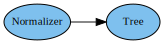

In [15]:
tree_plan.visualize()

In [17]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.2, random_state=0)
tree_trained = tree_plan.auto_configure(train_x, train_y, optimizer=Hyperopt, cv=3, max_evals= 10, scoring='r2')

100%|██████████| 10/10 [00:31<00:00,  3.17s/trial, best loss: -0.5329179400023036]


In [18]:
# visualize the hyperparameters
tree_trained.pretty_print(ipython_display=True, show_imports=False)

```python
normalizer = Normalizer(norm='max')
tree = Tree(criterion='mae', min_samples_leaf=3, min_samples_split=19, splitter='random')
pipeline = normalizer >> tree
```

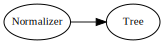

In [19]:
tree_trained.visualize()

In [24]:
from sklearn.metrics import r2_score as r2
predicted = tree_trained.predict(test_x)
print(f'R2 score is {r2(test_y, predicted):.2f}')

R2 score is 0.51
